In [1]:
import numpy as np
from matplotlib import pyplot as plt

Documentation:

https://www.cosmos.esa.int/web/gaia-users/archive/datalink-products

## Import `astroquery`

In [2]:
#!pip install astroquery
from astroquery.gaia import Gaia

## Create a list containing the GAIA IDs of the objects you are interested in:

In [3]:
starID_array = [1974542151266029696, 1974542361726544384, 1974544320231472640]

## Download the spectra:

In [4]:
retrieval_type = 'XP_SAMPLED'     # Options are: 'EPOCH_PHOTOMETRY', 'MCMC_GSPPHOT', 'MCMC_MSC', 'XP_SAMPLED', 'XP_CONTINUOUS', 'RVS', 'ALL'
data_structure = 'INDIVIDUAL'     # Options are: 'INDIVIDUAL' or 'RAW'
data_release   = 'Gaia DR3'       # Options are: 'Gaia DR3' (default), 'Gaia DR2'

datalink = Gaia.load_data(ids=starID_array,
                          data_release=data_release, 
                          retrieval_type=retrieval_type, 
                          data_structure=data_structure, 
                          format='votable',               
                          verbose=True,   
                          output_file='Gaia_spectra/', 
                          overwrite_output_file='True')

ERROR: Path c:\Users\Marco\OneDrive - Università degli Studi di Milano-Bicocca\Documenti\PythonProjects\Laboratory-of-Data-Acquisition\Gaia_spectra already exist [astroquery.gaia.core]


Retrieving data.
Data request: VALID_DATA=false&ID=1974542151266029696%2C1974542361726544384%2C1974544320231472640&RELEASE=Gaia+DR3&DATA_STRUCTURE=INDIVIDUAL&FORMAT=votable&RETRIEVAL_TYPE=XP_SAMPLED&USE_ZIP_ALWAYS=true
------>https
host = gea.esac.esa.int:443
context = /data-server/data
Content-type = application/x-www-form-urlencoded
200 200
Reading...
Done.
INFO: output_file = c:\Users\Marco\OneDrive - Università degli Studi di Milano-Bicocca\Documenti\PythonProjects\Laboratory-of-Data-Acquisition\Gaia_spectra\.zip [astroquery.gaia.core]


## Create a list containing the keys of the dictionary

In [5]:
dl_keys  = [inp for inp in datalink.keys()]

print()
print(f'The following Datalink products have been downloaded:')
for dl_key in dl_keys:
    print(f' * {dl_key}')


The following Datalink products have been downloaded:
 * XP_SAMPLED-Gaia DR3 1974542151266029696.xml
 * XP_SAMPLED-Gaia DR3 1974542361726544384.xml
 * XP_SAMPLED-Gaia DR3 1974544320231472640.xml


## Extract wavelengths and fluxes

In [6]:
wavelengths = datalink[dl_keys[0]][0].to_table().as_array()['wavelength']
wavelengths = np.ma.getdata(wavelengths)
wavelengths

array([ 336.,  338.,  340.,  342.,  344.,  346.,  348.,  350.,  352.,
        354.,  356.,  358.,  360.,  362.,  364.,  366.,  368.,  370.,
        372.,  374.,  376.,  378.,  380.,  382.,  384.,  386.,  388.,
        390.,  392.,  394.,  396.,  398.,  400.,  402.,  404.,  406.,
        408.,  410.,  412.,  414.,  416.,  418.,  420.,  422.,  424.,
        426.,  428.,  430.,  432.,  434.,  436.,  438.,  440.,  442.,
        444.,  446.,  448.,  450.,  452.,  454.,  456.,  458.,  460.,
        462.,  464.,  466.,  468.,  470.,  472.,  474.,  476.,  478.,
        480.,  482.,  484.,  486.,  488.,  490.,  492.,  494.,  496.,
        498.,  500.,  502.,  504.,  506.,  508.,  510.,  512.,  514.,
        516.,  518.,  520.,  522.,  524.,  526.,  528.,  530.,  532.,
        534.,  536.,  538.,  540.,  542.,  544.,  546.,  548.,  550.,
        552.,  554.,  556.,  558.,  560.,  562.,  564.,  566.,  568.,
        570.,  572.,  574.,  576.,  578.,  580.,  582.,  584.,  586.,
        588.,  590.,

In [7]:
fluxes = datalink[dl_keys[0]][0].to_table().as_array()['flux']
fluxes = np.ma.getdata(fluxes)
fluxes

array([1.17388126e-16, 1.05197237e-16, 9.56255662e-17, 9.53671285e-17,
       9.80840330e-17, 9.35908475e-17, 8.63012224e-17, 8.77329529e-17,
       1.00554378e-16, 1.08033302e-16, 9.65883912e-17, 8.41244271e-17,
       8.60622201e-17, 9.42436518e-17, 1.00895368e-16, 1.06910666e-16,
       1.14397438e-16, 1.18833561e-16, 1.15473712e-16, 1.06866600e-16,
       9.98327325e-17, 9.84032387e-17, 9.65220315e-17, 8.83334794e-17,
       7.88167135e-17, 7.61007553e-17, 8.02812533e-17, 8.48786570e-17,
       8.73005624e-17, 9.09152160e-17, 1.00880889e-16, 1.17985707e-16,
       1.37245979e-16, 1.52794023e-16, 1.60554632e-16, 1.62682365e-16,
       1.63783336e-16, 1.66929772e-16, 1.71672072e-16, 1.75800603e-16,
       1.75835040e-16, 1.71515185e-16, 1.65053224e-16, 1.59438640e-16,
       1.56545228e-16, 1.56434174e-16, 1.57072096e-16, 1.57505155e-16,
       1.57649216e-16, 1.58643130e-16, 1.62346080e-16, 1.69559849e-16,
       1.78668405e-16, 1.87682662e-16, 1.94592611e-16, 1.98601896e-16,
      

In [8]:
fluxes_err = datalink[dl_keys[0]][0].to_table().as_array()['flux_error']
fluxes_err= np.ma.getdata(fluxes_err)
fluxes_err

array([9.4410557e-18, 7.2530918e-18, 5.9182018e-18, 5.1632175e-18,
       4.7846865e-18, 4.6626492e-18, 4.7365599e-18, 5.0153094e-18,
       5.3318623e-18, 5.7369984e-18, 5.2343766e-18, 4.7809493e-18,
       4.2288033e-18, 4.3069677e-18, 4.0438536e-18, 4.4587732e-18,
       4.4383133e-18, 4.7465787e-18, 4.9764960e-18, 4.9243782e-18,
       5.5697553e-18, 5.3660848e-18, 5.9393057e-18, 5.7805974e-18,
       5.3732656e-18, 5.4309767e-18, 4.5212059e-18, 4.2795206e-18,
       3.9536355e-18, 3.3151455e-18, 3.3368249e-18, 3.1213338e-18,
       2.7878898e-18, 2.8920796e-18, 2.7903701e-18, 2.5921164e-18,
       2.6766781e-18, 2.6488528e-18, 2.5151465e-18, 2.5801424e-18,
       2.6042528e-18, 2.5109886e-18, 2.5402460e-18, 2.5981795e-18,
       2.5294162e-18, 2.5035178e-18, 2.5708275e-18, 2.5638490e-18,
       2.4943269e-18, 2.5059189e-18, 2.5514084e-18, 2.5218018e-18,
       2.4714972e-18, 2.4924186e-18, 2.5195142e-18, 2.4799781e-18,
       2.4287694e-18, 2.4359119e-18, 2.4616864e-18, 2.4372219e

## Plot the spectrum

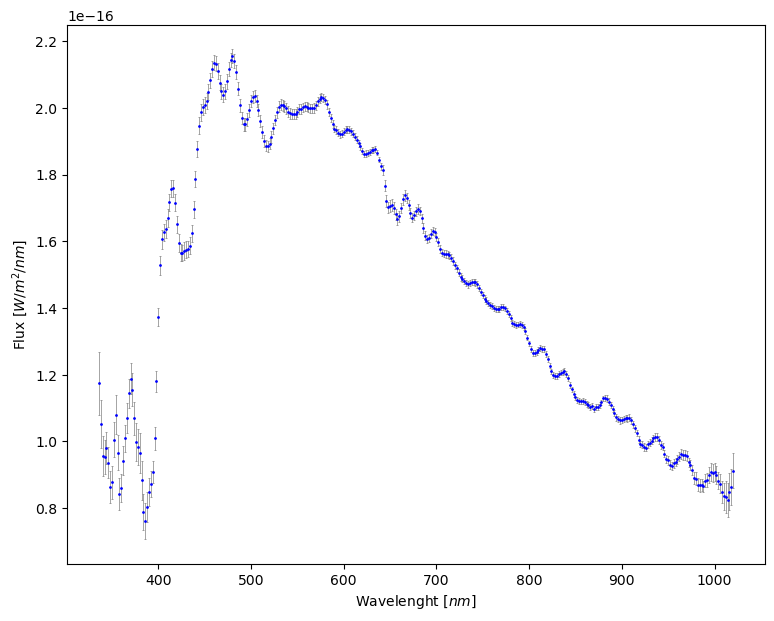

In [9]:
plt.figure(figsize=(9, 7))
plt.errorbar(wavelengths, fluxes, yerr=fluxes_err, fmt='o', ms=1, color='blue', ecolor='gray', elinewidth=0.5, capsize=1, capthick=0.5)
plt.xlabel('Wavelenght $[nm]$')
plt.ylabel('Flux $[W / m^2 / nm]$');